In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv('Cleaned_data.csv')

In [3]:
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,max_salary,average_salary,Company_txt,State,age,Python,R Studio,spark,aws,excel
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,91,72.0,Tecolote Research\n,0,47,1,0,0,0,1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,112,87.5,University of Maryland Medical System\n,0,36,1,0,0,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,90,85.0,KnowBe4\n,1,10,1,0,1,0,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,97,76.5,PNNL\n,1,55,1,0,0,0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,143,114.5,Affinity Solutions\n,1,22,1,0,0,0,1


In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'salary', 'min_salray', 'max_salary', 'average_salary',
       'Company_txt', 'State', 'age', 'Python', 'R Studio', 'spark', 'aws',
       'excel'],
      dtype='object')

In [7]:
df=df.drop(['Unnamed: 0'],axis=1)

In [8]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'salary', 'min_salray', 'max_salary', 'average_salary',
       'Company_txt', 'State', 'age', 'Python', 'R Studio', 'spark', 'aws',
       'excel'],
      dtype='object')

In [9]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,average_salary,Company_txt,State,age,Python,R Studio,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,91,72.0,Tecolote Research\n,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,112,87.5,University of Maryland Medical System\n,0,36,1,0,0,0,0


In [10]:
#job titile and Seniority
def job_titile(ip):
    if 'data scientist' in ip.lower():
        return 'data sceientist'
    elif 'data engineer' in ip.lower():
        return 'data engineer'
    elif 'analyst' in ip.lower():
        return 'analyst'
    elif 'machine learining' in ip.lower():
        return 'machine learning'
    elif 'director' in ip.lower():
        return 'director'
    else:
        return 'na'
def seniority(ip):
    if 'sr' in ip.lower() or 'sr.' in ip.lower() or 'senior' in ip.lower() or 'lead' in ip.lower() or 'principal' in ip.lower():
        return 'seniour'
    elif 'jr' in ip.lower() or 'jr.' in ip.lower() or 'junior' in ip.lower():
        return 'juniour'
    else:
        return 'na'

In [11]:
df['Job_role']=df['Job Title'].apply(job_titile)

In [13]:
df['Job_role'].value_counts()

data sceientist    279
na                 228
data engineer      119
analyst            102
director            14
Name: Job_role, dtype: int64

In [15]:
df['Seniority']=df['Job Title'].apply(seniority)

In [16]:
df['Seniority'].value_counts()

na         519
seniour    220
juniour      3
Name: Seniority, dtype: int64

In [17]:
#Fix State Losangels
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

AttributeError: 'DataFrame' object has no attribute 'job_state'

In [18]:
#Job Description length
df['desc_len']=df['Job Description'].apply(lambda x: len(x))

In [19]:
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [25]:
#Competetior Count
df['num_competetior']=df.Competitors.apply(lambda x: len(x.split(',')) if x!= '-1' else 0)

In [28]:
df.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,Python,R Studio,spark,aws,excel,Job_role,Seniority,desc_len,num_competetior
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data sceientist,na,2536,0


In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'salary', 'min_salray', 'max_salary', 'average_salary',
       'Company_txt', 'State', 'age', 'Python', 'R Studio', 'spark', 'aws',
       'excel', 'Job_role', 'Seniority', 'desc_len', 'num_competetior'],
      dtype='object')

In [34]:
df[df.hour ==1][['hour','min_salray','max_salary']].head(1)

,hour,min_salray,max_salary
165,1,17,24


In [41]:
df['min_salray']=df.apply(lambda x:x.min_salray*2 if x.hour==1 else x.min_salray,axis=1)

In [43]:
df['max_salary']=df.apply(lambda x:x.max_salary*2 if x.hour==1 else x.max_salary,axis=1)

In [45]:
df[df.hour==1][['hour','min_salray','max_salary']].head(1)

,hour,min_salray,max_salary
165,1,34,48


In [49]:
df['Company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company_txt, Length: 742, dtype: object

In [48]:
#remove new line from job titile
df['Company_txt']=df.Company_txt.apply(lambda x: x.replace('\n',''))

In [51]:
df.describe()

,Rating,Founded,hour,min_salray,max_salary,average_salary,State,age,Python,R Studio,spark,aws,excel,desc_len,num_competetior
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.001348,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.036711,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Job Description    742 non-null    object 
 3   Rating             742 non-null    float64
 4   Company Name       742 non-null    object 
 5   Location           742 non-null    object 
 6   Headquarters       742 non-null    object 
 7   Size               742 non-null    object 
 8   Founded            742 non-null    int64  
 9   Type of ownership  742 non-null    object 
 10  Industry           742 non-null    object 
 11  Sector             742 non-null    object 
 12  Revenue            742 non-null    object 
 13  Competitors        742 non-null    object 
 14  hour               742 non-null    int64  
 15  salary             742 non-null    object 
 16  min_salray         742 non

In [54]:
df.to_csv('eda_data.csv')

In [56]:
!pip install wordcloud

In [64]:
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS

In [60]:
!pip install nltk

  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434681 sha256=108e3665cd036654f0eb92abbfd1dd327283a96a262872982eda80d783a1b7a8
  Stored in directory: c:\users\rb00340789\appdata\local\pip\cache\wheels\ff\d5\7b\f1fb4e1e1603b2f01c2424dd60fbcc50c12ef918bafc44b155
Successfully built nltk


In [74]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'salary', 'min_salray', 'max_salary', 'average_salary',
       'Company_txt', 'State', 'age', 'Python', 'R Studio', 'spark', 'aws',
       'excel', 'Job_role', 'Seniority', 'desc_len', 'num_competetior'],
      dtype='object')

<AxesSubplot:>

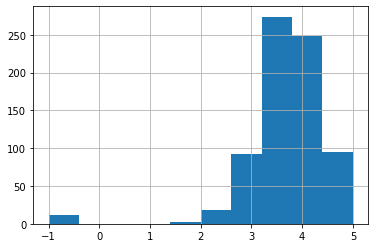

In [75]:
df.Rating.hist()

<AxesSubplot:>

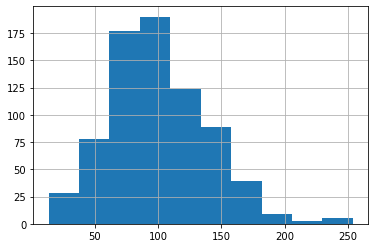

In [76]:
df.average_salary.hist()

<AxesSubplot:>

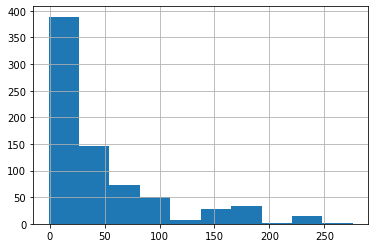

In [77]:
df.age.hist()

<AxesSubplot:>

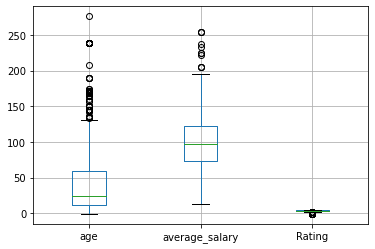

In [85]:
df.boxplot(column=['age','average_salary','Rating'])

In [86]:
corremat=df.corr()

In [91]:
import seaborn as sns

<AxesSubplot:>

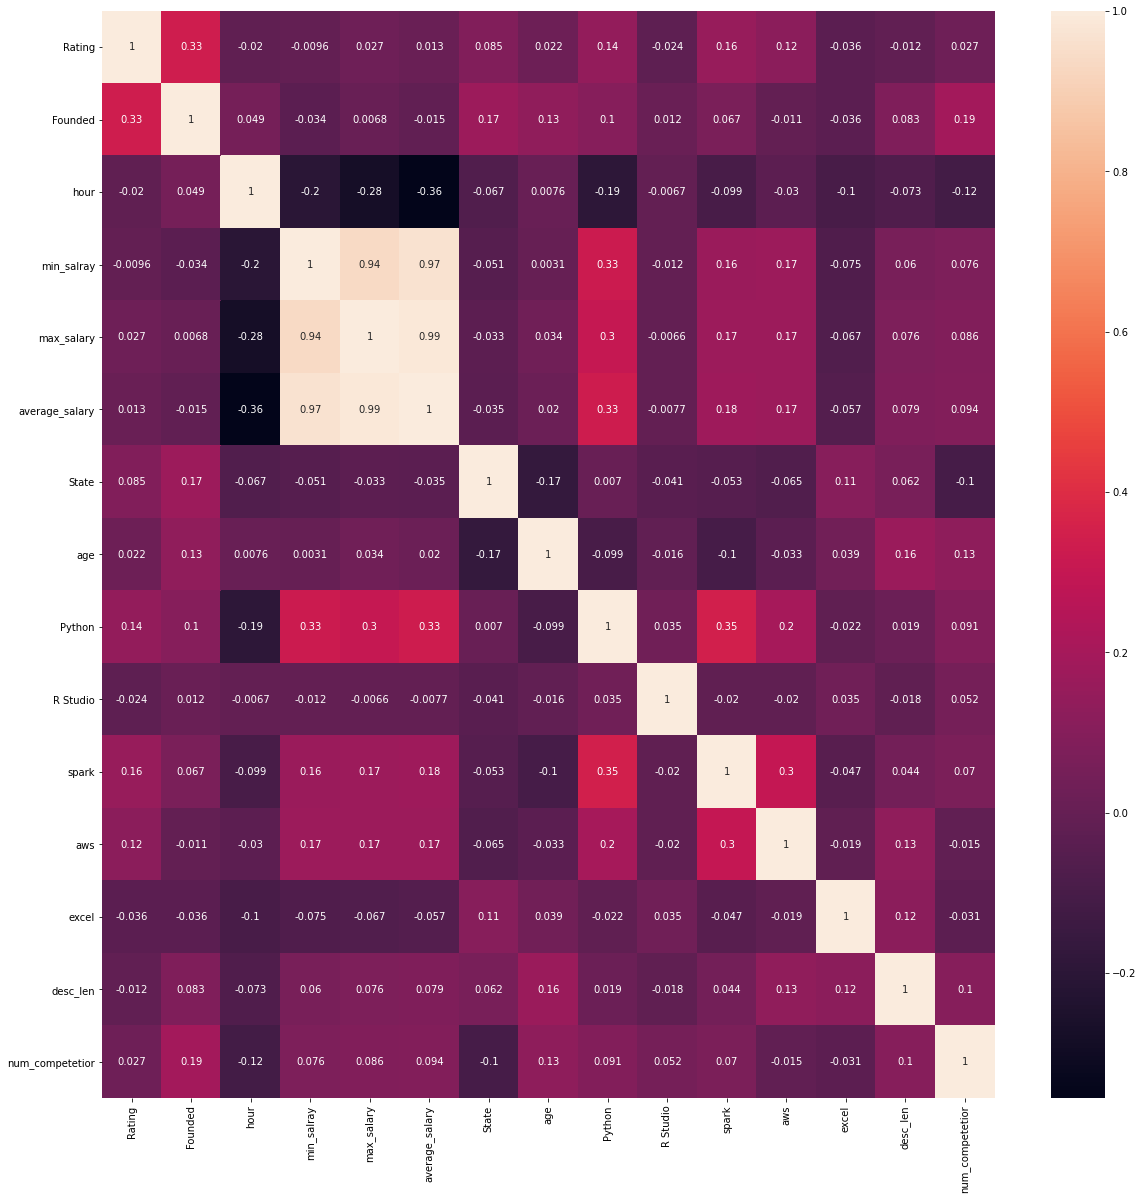

In [96]:
plt.figure(figsize=(20,20))
sns.heatmap(corremat,annot=True)

In [99]:
pd.pivot_table(df,index='Job_role',values="average_salary")

,average_salary
Job_role,
analyst,65.857843
data engineer,105.403361
data sceientist,117.564516
director,168.607143
na,88.785088


In [103]:
pd.pivot_table(df,index=['Job_role','Seniority'],values="average_salary").sort_values('average_salary',ascending=False)

average_salary
Job_role        Seniority                
director        na             168.607143
data sceientist seniour        138.956522
data engineer   seniour        124.689189
na              seniour        112.671875
data sceientist na             107.043011
                juniour        106.500000
data engineer   na              96.701220
na              na              79.463415
analyst         seniour         79.092593
                na              61.308219
                juniour         53.250000

In [98]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hour', 'salary', 'min_salray', 'max_salary', 'average_salary',
       'Company_txt', 'State', 'age', 'Python', 'R Studio', 'spark', 'aws',
       'excel', 'Job_role', 'Seniority', 'desc_len', 'num_competetior'],
      dtype='object')

In [69]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rb00340789\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rb00340789\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [71]:
import matplotlib.pyplot as plt

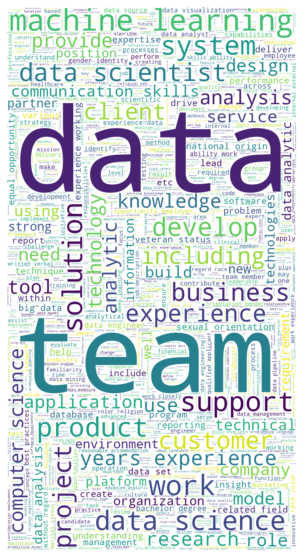

In [72]:
words=" ".join(df['Job Description'])
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [73]:
wc